In [2]:
%matplotlib inline

# Model Evaluation Metrics For Classification

Evaluate, Validate & Improve Machine Learning Models based on metrics.

Tweaking algorthims to work best for us!

## Testing model 

In [5]:
# Split input data into random train and test subsets
from sklearn.model_selection import train_test_split 

## Accuracy
Measure how good the model is 
$$
accraucy = \frac{correctly \ classified \ examples}{all \ examples} = \frac{TP + TN}{TP + TN + FP + FN} 
$$

In [9]:
# Accuracy classification score
from sklearn.metrics import accuracy_score

## False negative, false positive & Confusion Matrix

Sometimes in the literature, you'll see False Positives and False Negatives as Type 1 and Type 2 errors. Here is the correspondence:

- **Type 1 Error** (Error of the first kind, or False Positive): for a medical example, this is when we misdiagnose a healthy patient as sick.
- **Type 2 Error** (Error of the second kind, or False Negative): for a medical example, this is when we misdiagnose a sick patient as healthy.

In [11]:
# Compute confusion matrix to evaluate the accuracy of a classification
# TP FN
# FP TN
from sklearn.metrics import confusion_matrix

## Precision, recall

Depends on the case, sometimes we need high precision & sometimes we need a high recall

- Precision focuses on the **predicted** "positive" values in your dataset. **High Precision** means **NOT OK with FP** & **OK with FN**
$$
Precision = \frac{TP}{TP + FP} =\frac{|\{\text{relevant documents}\}\cap\{\text{retrieved documents}\}|}{|\{\text{retrieved documents}\}|}
$$
***
- Recall focuses on the **actual** "positive" values in your dataset. **High Recall** means **OK with FP** & **NOT OK with FN**
$$
Recall = \frac{TP}{TP + FN} = \frac{|\{\text{relevant documents}\}\cap\{\text{retrieved documents}\}|}{|\{\text{relevant documents}\}|}
$$


## F1 Score & F-beta Score

- **F1 Score** The reason why F1 score is not the arithmetic average of P & R is that we need the socre to be very low when either of P or R is very low even if the other one is high (we punish the model for the very low value). Hence F1 Score is always closer the smallest between P & R. If one of them is small it rises a flag!
***
$$
F1 Score = Harmonic\_mean(P, R) = \frac{2}{\frac{1}{P} + \frac{1}{R}} = \frac{2 * (P  * R)}{P + R} < arithmetic\_mean(P, R) = \frac{(P + R)}{2}
$$
***
- **F-beta Score** It is not an exacte science! finding a good value for beta requires a lot of intuition of your data & a lot experimentation : 

    - If **β = 0** then we get **precision**.
    - If **β = ∞** then we get **recall**.
    - For **other values of β**, if they are close to 0, we get something close to precision, if they are large numbers, then we get something close to recall, 
    - And if β = 1 then we get the **harmonic mean** (F1 score) of precision and recall.
***
$$
F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}
$$
***


In [14]:
# The F-beta score is the weighted harmonic mean of precision and recall,
# reaching its optimal value at 1 and its worst value at 0.
from sklearn.metrics import fbeta_score

## ROC Curve

Receiver Operating Caractheristic Curve, a performance measurement for classification problem at various thresholds settings. **The closer your area under the ROC curve is to 1, the better your model is.**


- **True Positive Rate**  aka sensitivity, recall or probability of detection
***
$$
        TPR = \frac{TP}{TP + FN}
$$
- **Specitity**
***
$$
         specitity = \frac{TN}{TN + FP}
$$
- **False Positive Rate** aka the fall-out or probability of false alarm
***
$$
         FPR = \frac{FP}{TN + FP} = 1 - specitity
$$


- Sensitivity⬆️, Specificity⬇️ and Sensitivity⬇️, Specificity⬆️



- TPR⬆️, FPR⬆️ and TPR⬇️, FPR⬇️

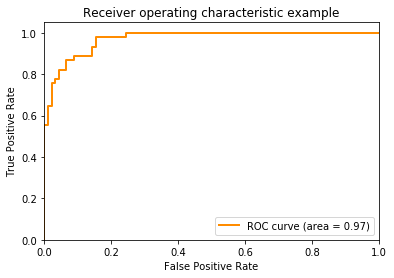

In [3]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

random_state = 0

iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute micro-average ROC curve and ROC area since we have multi class model
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Model Evaluation Metrics For Regression



## Mean Absolute Error

This is a useful metric to optimize on when the value you are trying to predict follows a skewed distribution. Optimizing on an absolute value is particularly helpful in these cases because **outliers will not influence models attempting to optimize on this metric** as much as if you use the mean squared error. The optimal value for this technique is the median value. When you optimize for the R2 value of the mean squared error, the optimal value is actually the mean.

In [6]:
# Mean absolute error regression loss
from sklearn.metrics import mean_absolute_error

## Mean Squared Error

The mean squared error is by far the most used metric for optimization in regression problems. Similar to with MAE, you want to find a model that minimizes this value. This metric can be greatly impacted by skewed distributions and outliers. When a model is considered optimal via MAE, but not for MSE, it is useful to keep this in mind. In many cases, it is easier to actually optimize on MSE, as the a quadratic term is differentiable. However, an absolute value is not differentiable. This factor makes **this metric better for gradient based optimization algorithms.**

In [11]:
# Mean squared error regression loss
from sklearn.metrics import mean_squared_error

## R2 Score

R2 value is another common metric when looking at regression values. Optimizing a model to have the lowest MSE will also optimize a model to have the the highest R2 value. This is a convenient feature of this metric. The R2 value is frequently interpreted as the 'amount of variability' captured by a model. Therefore, you can think of MSE, as the average amount you miss by across all the points, and the R2 value as the amount of the variability in the points that you capture with a model.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

- R-squared = Explained variation / Total variation

- R-squared is always between 0 and 100%:

    - 0% indicates that the model explains none of the variability of the response data around its mean.
    - 100% indicates that the model explains all the variability of the response data around its mean.

In [15]:
# R^2 (coefficient of determination) regression score function. Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score